In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plt_conf as conf 

import rutinas as ru
import pandas as pd

from scipy.linalg import solve, norm, eig, eigh
from scipy.optimize import curve_fit, root_scalar
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp, quad


import plt_conf as conf

In [2]:
conf.general()  # cargando configuración general

## Convergencia

In [3]:
# Resolución de ecuaciones del fondo
nodos, ell = 1, 1

en, lam, nv, rD, sD, dsD, uD, duD, cer0, ell = ru.profiles(nodos, ell)#, Nptos=900, #1800 Rtol=1e-11, Atol=1e-12
                                                           #Rtol=1e-11, Atol=1e-12) # no escalada #1500 2500

Finding a profile with  1 nodes
Maxima precisión alcanzada 0.33783151192188826 radio 32.99436221518425
masa  -10.714976632789813 Uf  -0.3247517428252849

E(U(inf))  -0.053727409224277295
energía =  -0.1583693272407303 $\lambda = $ 0.27998193449879394

Checking normalización,  1.0000000000706648 1


checking  -1.010138803200563 10.714977040436011 0.014512193868054753 -0.1583693265092333

Plot shooting y extensión


/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17767/3813843571.py:15: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 5.),


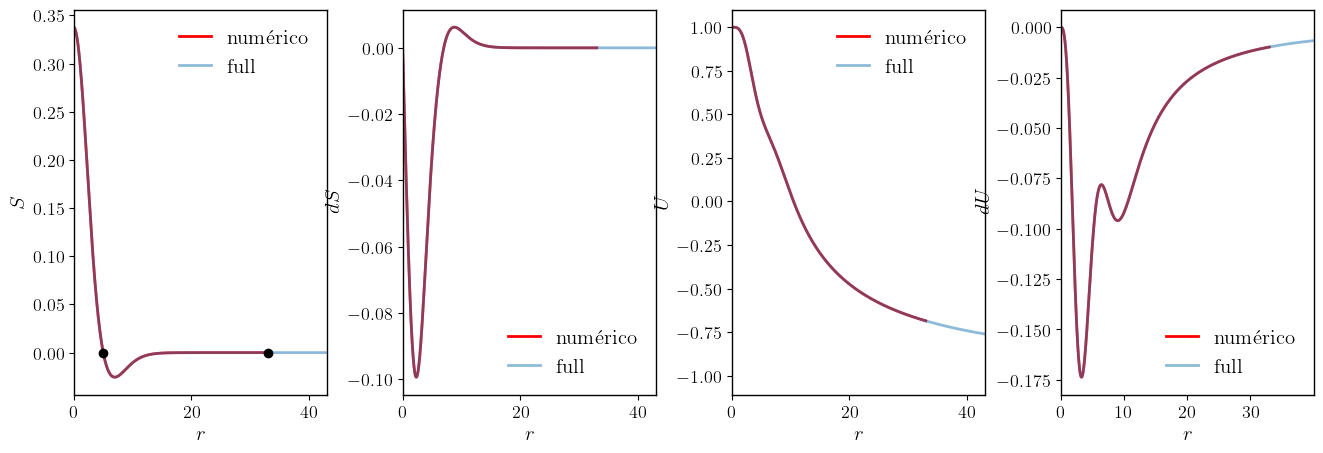

Checking normalización, 0.9999999989227866 1
Checking convergencia de la Energía U(inf), U(asint) -0.1581303781136463 -0.1583693272407303

Plot extensión normalizada y interpolación


/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17767/3813843571.py:92: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 5.),


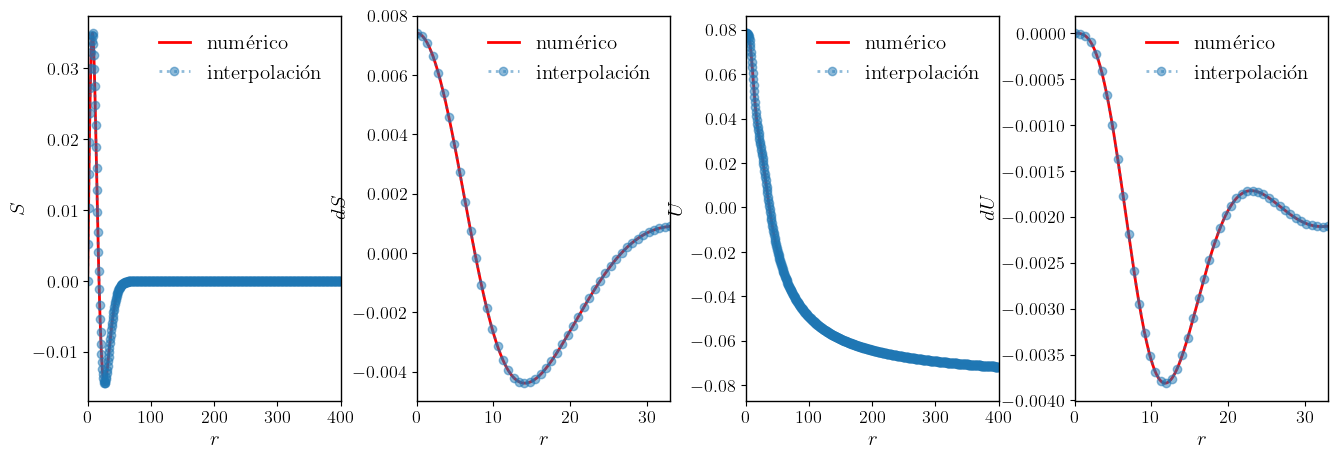

In [4]:
# extendiendo soluciones
Ext = 7000
Np = 4800

rDnew, sDnew, dsDnew, uDnew, duDnew = ru.extend(ell, rD[:-160], sD[:-160], 
                                                dsD[:-160], uD[:-160], duD[:-160], Ext, Np)

# graficando
yceros = np.zeros(len(cer0))
rad = np.linspace(rD[-1], rD[-1]+Ext, 1000)

print('')
print('Plot shooting y extensión')

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=.3))

ax[0].plot(rD[:-1], sD[:-1], ls='-', c='red', label='numérico') 
#ax[0].plot(rad, sigm(rad, Ap, k), ls=':', c='red', label='extensión') 
ax[0].plot(rDnew, sDnew, ls='-', alpha=0.5, label='full') 
ax[0].plot(cer0, yceros, 'ko')

ax[0].set_xlim(rD[0], rD[-1]+10)
ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$S$')
ax[0].legend(frameon=False)
#ax[0].set_yscale('log')

ax[1].plot(rD[:-1], dsD[:-1], ls='-', c='red', label='numérico') 
#ax[1].plot(rad, dsigm(rad, Ap, k), ls=':', c='red',label='extensión') 
ax[1].plot(rDnew, dsDnew, ls='-', alpha=0.5, label='full') 

ax[1].set_xlim(rD[0], rD[-1]+10)
ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$dS$')
ax[1].legend(frameon=False)


ax[2].plot(rD, uD, ls='-', c='red', label='numérico') 
#ax[2].plot(rad, Up(rad, AA, BB), ls=':', c='red',label='extensión')
ax[2].plot(rDnew, uDnew, ls='-', alpha=0.5, label='full') 

ax[2].set_xlim(rD[0], rD[-1]+10)
ax[2].set_xlabel(r'$r$')
ax[2].set_ylabel(r'$U$')
ax[2].legend(frameon=False)
#ax[1].set_yscale('log')

ax[3].plot(rD, duD, ls='-', c='red', label='numérico')  
#ax[3].plot(rad, dUp(rad, BB), ls=':',c='red', label='extensión') 
ax[3].plot(rDnew, duDnew, ls='-', alpha=0.5, label='full')

ax[3].set_xlim(rD[0], rD[-1]+7)
ax[3].set_xlabel(r'$r$')
ax[3].set_ylabel(r'$dU$')
ax[3].legend(frameon=False)

plt.show()

# normalizando

# reescalando
xN = rDnew/lam
sN = (rDnew**ell*sDnew)*lam**2
dsN = rDnew**(ell-1)*(ell*sDnew+rDnew*dsDnew)*lam**3
uN = uDnew*lam**2
duN = duDnew*lam**3

# interpolación de los datos
fsN = interp1d(xN, sN, kind='quadratic') # quadratic
fdsN = interp1d(xN, dsN, kind='linear')
fuN = interp1d(xN, uN, kind='quadratic')
fduN = interp1d(xN, duN, kind='quadratic')

# checking
Nf = lambda x: x**2*fsN(x)**2/(2*ell+1)
Nv = quad(Nf, xN[0], xN[-1])[0]

Bv = quad(Nf, xN[0], xN[-1])[0]
enA = 2*uN[-1]
print(r'Checking normalización,', Nv, 1)
print(r'Checking convergencia de la Energía U(inf), U(asint)', enA, en)

# graficando
LL = 200*(nodos+1) #200
rad = np.linspace(0, rDnew[-1], 10000)

print('')
print('Plot extensión normalizada y interpolación')

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=.3))

ax[0].plot(xN, sN, ls='-', c='red', label='numérico') 
ax[0].plot(rad, fsN(rad), ':o', alpha=0.5, label='interpolación') 

ax[0].set_xlim(0, LL)
ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$S$')
ax[0].legend(frameon=False)

ax[1].plot(xN, dsN, ls='-', c='red', label='numérico') 
ax[1].plot(rad, fdsN(rad), ':o', alpha=0.5, label='interpolación') 

ax[1].set_xlim(0, rD[-1])
ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$dS$')
ax[1].legend(frameon=False)


ax[2].plot(xN, uN, ls='-', c='red', label='numérico') 
ax[2].plot(rad, fuN(rad), ':o', alpha=0.5, label='interpolación') 

ax[2].set_xlim(0, LL)
ax[2].set_xlabel(r'$r$')
ax[2].set_ylabel(r'$U$')
ax[2].legend(frameon=False)
#ax[1].set_yscale('log')

ax[3].set_xlim(0, rD[-1])
ax[3].plot(xN, duN, ls='-', c='red', label='numérico')  
ax[3].plot(rad, fduN(rad), ':o', alpha=0.5, label='interpolación') 

ax[3].set_xlabel(r'$r$')
ax[3].set_ylabel(r'$dU$')
ax[3].legend(frameon=False)

In [5]:
# Convergencia autovalores
#%load_ext autoreload
#%autoreload 2

import rutina_conv as rc

In [6]:
# convergencia variando N con LL fijo
LL = 200*(nodos+1)
Nmin = 65
Nmax = int(LL*3/4)+150
Nval = [40, 42, 45, 50, 60, 70, 100, 120, 150, 170, 
        200, 220, 250, 270, 300, 320, 350, 370] #np.linspace(Nmin, Nmax, 25, dtype=np.int32) 40

colum_data = []
for i in Nval:
    lEnigF1, _, _, _ = ru.espectro(LL, i, fsN, fuN, ell)
    
    jj = np.real(lEnigF1)!=0
    autoval = lEnigF1[jj]
    
    autoval = np.insert(autoval, 0, i, axis=None)
    
    colum_data.append(autoval)

# creando dataframe
datos_Autov = pd.DataFrame(colum_data) # , index=Lval

nameC = []
for colName in datos_Autov:
    if colName==0:
        nameC.append('N-value')
    else:
        nameC.append(colName)
    
datos_Autov.columns = nameC  # poniendo nuevos nombres
datos_Autov['N-value'] = abs(datos_Autov['N-value'])  # pasando la columna de L a reales

Comprobando reescalamiento  True True
Comprobando la inversa de D2  True
Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
Comprobando reescalamiento  True True
Comprobando la inversa de D2  True
Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
Comprobando reescalamiento  True True
Comprobando la inversa de D2  True
Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  Tr

Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  Tr

Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  Tr

In [7]:
# Organizando los auto-valores
datos_Org = rc.Organ(datos_Autov, Rtol=1e-02, Atol=1e-04)
datos_Org

The referential row is   0


,N-value,1,2,3,4,5,6
0,40.0,-0.006238+0.033181j,-0.006238-0.033181j,-1.409416e-03+7.069266e-16j,1.409416e-03+7.069266e-16j,0.006238-0.033181j,0.006238+0.033181j
1,42.0,-0.006285+0.033457j,-0.006285-0.033457j,N000000000000a000000000000N,N000000000000a000000000000N,0.006285-0.033457j,0.006285+0.033457j
2,45.0,-0.006156+0.033382j,-0.006156-0.033382j,-4.982173e-04+3.380344e-17j,4.982173e-04+3.380344e-17j,0.006156-0.033382j,0.006156+0.033382j
3,50.0,-0.006187+0.033404j,-0.006187-0.033404j,-2.474769e-04+3.788629e-15j,2.474769e-04+3.788629e-15j,0.006187-0.033404j,0.006187+0.033404j
4,60.0,-0.006194+0.033402j,-0.006194-0.033402j,N000000000000a000000000000N,N000000000000a000000000000N,0.006194-0.033402j,0.006194+0.033402j
5,70.0,-0.006194+0.033402j,-0.006194-0.033402j,-1.740296e-06+8.914383e-16j,1.740296e-06+8.914383e-16j,0.006194-0.033402j,0.006194+0.033402j
6,100.0,-0.006194+0.033402j,-0.006194-0.033402j,N000000000000a000000000000N,N000000000000a000000000000N,0.006194-0.033402j,0.006194+0.033402j
7,120.0,-0.006194+0.033402j,-0.006194-0.033402j,-6.412899e-07-3.992248e-15j,6.412899e-07-3.992248e-15j,0.006194-0.033402j,0.006194+0.033402j
8,150.0,-0.006194+0.033402j,-0.006194-0.033402j,N000000000000a000000000000N,N000000000000a000000000000N,0.006194-0.033402j,0.006194+0.033402j
9,170.0,-0.006194+0.033402j,-0.006194-0.033402j,N000000000000a000000000000N,N000000000000a000000000000N,0.006194-0.033402j,0.006194+0.033402j


In [8]:
# convergencia variando N con LL fijo
N = 300
# Lmin = 65
# Lmax = 200*(nodos+1)+100
LLval = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600] #np.linspace(Lmin, Lmax, 25, dtype=np.int32)

colum_data2 = []
for i in LLval:
    lEnigF1, _, _, _ = ru.espectro(i, N, fsN, fuN, ell)
    
    jj = np.real(lEnigF1)!=0
    autoval2 = lEnigF1[jj]
    
    autoval2 = np.insert(autoval2, 0, i, axis=None)
    
    colum_data2.append(autoval2)

# creando dataframe
datos_Autov2 = pd.DataFrame(colum_data2) # , index=Lval

nameC2 = []
for colName in datos_Autov2:
    if colName==0:
        nameC2.append('N-value')
    else:
        nameC2.append(colName)
    
datos_Autov2.columns = nameC2  # poniendo nuevos nombres
datos_Autov2['N-value'] = abs(datos_Autov2['N-value'])  # pasando la columna de L a reales

Comprobando reescalamiento  True True
Comprobando la inversa de D2  True
Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  Tr

Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  Tr

Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  Tr

In [9]:
# Organizando los auto-valores
datos_Org2 = rc.Organ(datos_Autov2, Rtol=1e-02, Atol=1e-04)
datos_Org2

The referential row is   0


,N-value,1,2,3,4
0,100.0,-0.006194+0.033401j,-0.006194-0.033401j,0.006194-0.033401j,0.006194+0.033401j
1,150.0,-0.006194+0.033402j,-0.006194-0.033402j,0.006194-0.033402j,0.006194+0.033402j
2,200.0,-0.006194+0.033402j,-0.006194-0.033402j,0.006194-0.033402j,0.006194+0.033402j
3,250.0,-0.006194+0.033402j,-0.006194-0.033402j,0.006194-0.033402j,0.006194+0.033402j
4,300.0,-0.006194+0.033402j,-0.006194-0.033402j,0.006194-0.033402j,0.006194+0.033402j
5,350.0,-0.006194+0.033402j,-0.006194-0.033402j,0.006194-0.033402j,0.006194+0.033402j
6,400.0,-0.006194+0.033402j,-0.006194-0.033402j,0.006194-0.033402j,0.006194+0.033402j
7,450.0,-0.006194+0.033402j,-0.006194-0.033402j,0.006194-0.033402j,0.006194+0.033402j
8,500.0,-0.006194+0.033402j,-0.006194-0.033402j,0.006194-0.033402j,0.006194+0.033402j
9,550.0,-0.006194+0.033402j,-0.006194-0.033402j,0.006194-0.033402j,0.006194+0.033402j


In [10]:
# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17767/3203899154.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 7.5),
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17767/3203899154.py:44: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax1 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17767/3203899154.py:62: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax2 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17767/3203899154.py:101: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax3 = fig.ad

(0.0334018561, 0.0334018564)

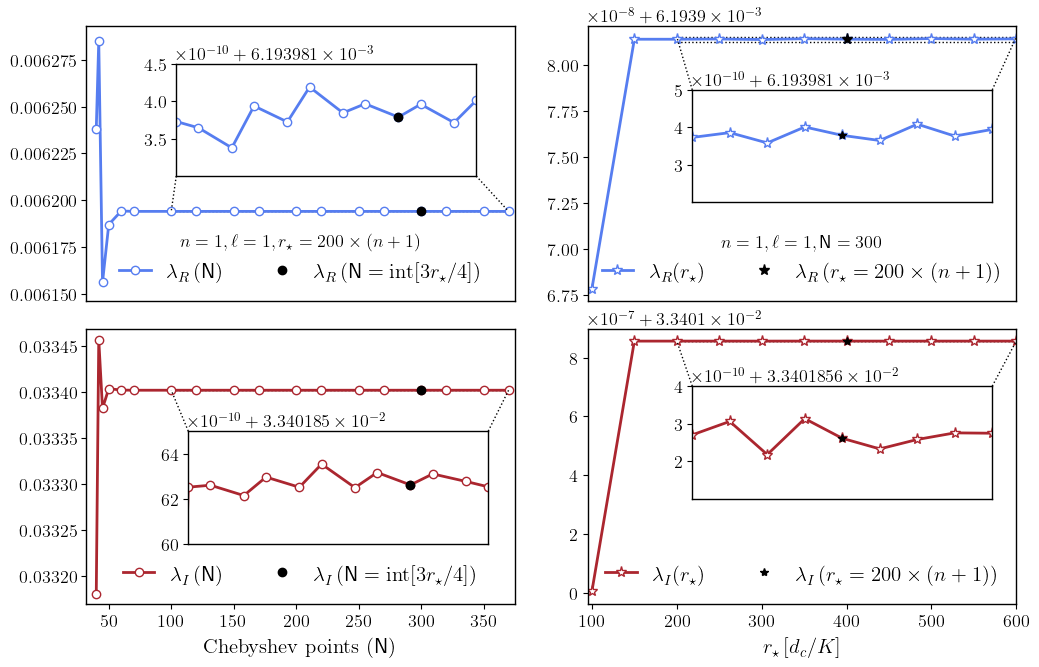

In [11]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 7.5),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.1, wspace=.17) # espacio vertical y horizontal entre los subplots
                      )                 
indices = [6]

for ii in indices:
    dR, dI = np.real(datos_Org[ii]), np.imag(datos_Org[ii])
    N_valu = np.array(datos_Org['N-value'])
    #ax[0][0].ticklabel_format(axis='y', style='sci', scilimits=(-7,8))

    ax[0][0].plot(N_valu,  np.abs(dR), '-', marker='o', mfc='white',
                  color = '#567df0', label = r'$\lambda_R\, (\mathsf{N})$')

    ax[1][0].plot(N_valu,  np.abs(dI), '-', marker='o', mfc='white', 
                  color = '#ab262f', label = r'$\lambda_I\, (\mathsf{N})$')

ax[0][0].plot(N_valu[14],  np.abs(dR)[14], ' ', marker='o', color = 'black', 
              label = r'$\lambda_R\, (\mathsf{N}=\mathrm{int}[3r_{\star}/4])$')
ax[1][0].plot(N_valu[14],  np.abs(dI)[14], ' ', marker='o', color = 'black', 
              label = r'$\lambda_I\, (\mathsf{N}=\mathrm{int}[3r_{\star}/4])$')

# ax[0][0].set_yscale('log')
# ax[1][0].set_yscale('log')

ax[0][0].set_xlim(32, 375)
ax[0][0].set_xticks([])
ax[0][0].set_ylim(min(dR)-1.0e-5, max(dR)+.8e-5)
# ax[0][0].set_ylabel(r'$\lambda_R\,[c_3^{-1}]$', labelpad=5)

# ax[1][0].set_ylabel(r'$\lambda_I\,[c_3^{-1}]$', labelpad=5)
ax[1][0].set_xlabel(r'Chebyshev points $(\mathsf{N})$', labelpad=5)
ax[1][0].set_xlim(32, 375)
ax[1][0].set_ylim(min(dI)-1.0e-5, max(dI)+1.2e-5)

#ax[0][0].vlines(x=int(LL*3/4), ymin=min(dR)-inc, ymax=max(dR)+inc, ls=':')
#ax[1][0].vlines(x=int(LL*3/4), ymin=min(dI)-inc, ymax=max(dI)+inc, ls=':')


# añadiendo figuras insertadas, en este caso los términos métricos
left, bottom, width, height = [0.2, 0.68, 0.25, 0.15]  # posición y dimensiones del insert
ax1 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
# en caso de que quieras que los ejes usen notacion científica descomentar
ax1.ticklabel_format(axis='y', style='sci', scilimits=(-7,10))

ax1.plot(N_valu,  np.abs(dR), '-', marker='o',  mfc='white',
             color = '#567df0', label = r'n=%2.9f'%(np.abs(dR[-1])))

ax1.plot(N_valu[14],  np.abs(dR)[14], '-', marker='o', color = 'black')

ax1.set_xlim(100, 370)
ax1.set_ylim(0.0061939813, 0.00619398145)
#ax1.set_yscale('log')
#ax1.set_ylabel(r'$B_I \, [c_1]$', labelpad=-2)
ax1.set_xticks([])
mark_inset(ax[0][0], ax1, loc1=3, loc2=4, fc="none", ec="0.", ls=':', color='black')

# añadiendo figuras insertadas, en este caso los términos métricos
left, bottom, width, height = [0.21, 0.19, 0.25, 0.15]  # posición y dimensiones del insert
ax2 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
# en caso de que quieras que los ejes usen notacion científica descomentar
ax2.ticklabel_format(axis='y', style='sci', scilimits=(-7,10))

ax2.plot(N_valu,  np.abs(dI), '-', marker='o',  mfc='white',
             color = '#ab262f', label = r'n=%2.9f'%(np.abs(dR[-1])))

ax2.plot(N_valu[14],  np.abs(dI)[14], '-', marker='o', color = 'black')

ax2.set_xlim(100, 370)
ax2.set_ylim(0.033401856, 0.0334018565)
ax2.set_xticks([]);
mark_inset(ax[1][0], ax2, loc1=1, loc2=2, fc="none", ec="0.", ls=':', color='black')

indices = [4]

for ii in indices:
    dR, dI = np.real(datos_Org2[ii]), np.imag(datos_Org2[ii])
    L_valu = np.array(datos_Org2['N-value'])
    
    ax[0][1].plot(L_valu,  np.abs(dR), '-', marker='*', mfc='white', markersize=8,
                  color = '#567df0', label = r'$\lambda_R (r_{\star})$')

    ax[1][1].plot(L_valu,  np.abs(dI), '-', marker='*', mfc='white', markersize=8, 
                  color = '#ab262f', label = r'$\lambda_I (r_{\star})$')

ax[0][1].set_xlim(95, 600)
ax[1][1].set_xlim(95, 600)
ax[0][1].set_xticks([])

ax[1][1].set_xlabel(r'$r_{\star}\,[d_c/K]$', labelpad=5)

ax[0][1].plot(L_valu[6],  np.abs(dR)[6], ' ', marker='*', markersize=8, color = 'black', 
              label = r'$\lambda_R\, (r_{\star}=200 \times (n+1))$')
ax[1][1].plot(L_valu[6],  np.abs(dI)[6], ' ', marker='*', color = 'black', 
              label = r'$\lambda_I\, (r_{\star}=200 \times (n+1))$')

# añadiendo figuras insertadas, en este caso los términos métricos
left, bottom, width, height = [0.63, 0.645, 0.25, 0.15]  # posición y dimensiones del insert
ax3 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
# en caso de que quieras que los ejes usen notacion científica descomentar
ax3.ticklabel_format(axis='y', style='sci', scilimits=(-7,10))

ax3.plot(L_valu,  np.abs(dR), '-', marker='*',  mfc='white',markersize=8,
             color = '#567df0', label = r'n=%2.9f'%(np.abs(dR[-1])))

ax3.plot(L_valu[6],  np.abs(dR)[6], '-', marker='*', color = 'black')

ax3.set_xlim(200, 600)
ax3.set_ylim(6.1939812e-03, 6.1939815e-03)
ax3.set_xticks([]);
mark_inset(ax[0][1], ax3, loc1=1, loc2=2, fc="none", ec="0.", ls=':', color='black')

# añadiendo figuras insertadas, en este caso los términos métricos
left, bottom, width, height = [0.63, 0.25, 0.25, 0.15]  # posición y dimensiones del insert
ax4 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
# en caso de que quieras que los ejes usen notacion científica descomentar
ax4.ticklabel_format(axis='y', style='sci', scilimits=(-7,10))

ax4.plot(L_valu,  np.abs(dI), '-', marker='*',  mfc='white',markersize=8,
             color = '#ab262f', label = r'n=%2.9f'%(np.abs(dR[-1])))

ax4.plot(L_valu[6],  np.abs(dI)[6], '-', marker='*', color = 'black')

ax4.set_xlim(200, 600)
#
ax4.set_xticks([]);
mark_inset(ax[1][1], ax4, loc1=1, loc2=2, fc="none", ec="0.", ls=':', color='black')

ax[0][0].legend(loc='lower center', frameon=False, ncol=2,
                title=r'$n=1, \ell=1, r_{\star}=200 \times (n+1)$')
ax[1][0].legend(loc='lower center', frameon=False, ncol=2)


#ax[0][0].text(x=100, y=6.174e-03, s=r'$\ell=1$')
#ax[0][0].text(x=100, y=6.162e-03, s=r'$n=1$')
# ax[0][0].text(x=238, y=6.169e-03, s=r'$r_{\star}=400\,[d_c/K]$')


ax[0][1].legend(loc='lower center', frameon=False, ncol=2,
                title=r'$n=1, \ell=1, \mathsf{N}=300$')
ax[1][1].legend(loc='lower center', frameon=False, ncol=2)

#ax[0][1].text(x=480, y=6.193971e-03, s=r'$\mathsf{N}=300$') #, transform=ax[0][1].transAxes)

ax4.set_ylim(3.34018561e-02, 3.34018564e-02)



/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17767/3610068615.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 7.5),
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17767/3610068615.py:44: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax1 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17767/3610068615.py:62: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax2 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17767/3610068615.py:101: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax3 = fig.ad

(0.0334018561, 0.0334018564)

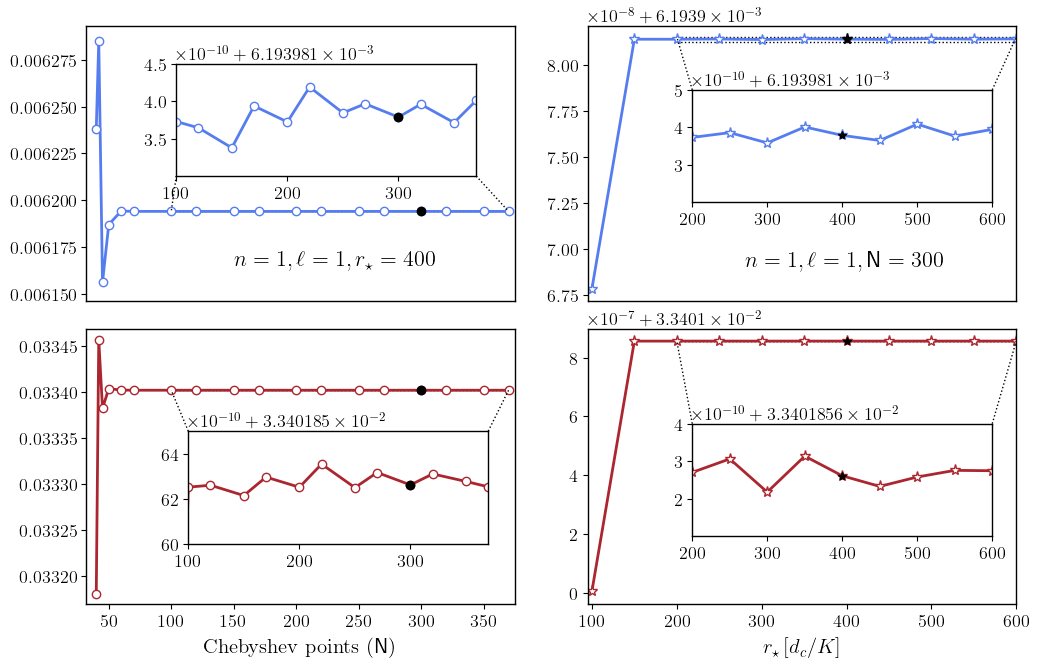

In [45]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 7.5),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.1, wspace=.17) # espacio vertical y horizontal entre los subplots
                      )                 
indices = [6]

for ii in indices:
    dR, dI = np.real(datos_Org[ii]), np.imag(datos_Org[ii])
    N_valu = np.array(datos_Org['N-value'])
    #ax[0][0].ticklabel_format(axis='y', style='sci', scilimits=(-7,8))

    ax[0][0].plot(N_valu,  np.abs(dR), '-', marker='o', mfc='white',
                  color = '#567df0', label = r'$\lambda_R\, (\mathsf{N})$')

    ax[1][0].plot(N_valu,  np.abs(dI), '-', marker='o', mfc='white', 
                  color = '#ab262f', label = r'$\lambda_I\, (\mathsf{N})$')

ax[0][0].plot(N_valu[14],  np.abs(dR)[14], ' ', marker='o', color = 'black', 
              label = r'$\lambda_R\, (\mathsf{N}=\mathrm{int}[3r_{\star}/4])$')
ax[1][0].plot(N_valu[14],  np.abs(dI)[14], ' ', marker='o', color = 'black', 
              label = r'$\lambda_I\, (\mathsf{N}=\mathrm{int}[3r_{\star}/4])$')

# ax[0][0].set_yscale('log')
# ax[1][0].set_yscale('log')

ax[0][0].set_xlim(32, 375)
ax[0][0].set_xticks([])
ax[0][0].set_ylim(min(dR)-1.0e-5, max(dR)+.8e-5)
# ax[0][0].set_ylabel(r'$\lambda_R\,[c_3^{-1}]$', labelpad=5)

# ax[1][0].set_ylabel(r'$\lambda_I\,[c_3^{-1}]$', labelpad=5)
ax[1][0].set_xlabel(r'Chebyshev points $(\mathsf{N})$', labelpad=5)
ax[1][0].set_xlim(32, 375)
ax[1][0].set_ylim(min(dI)-1.0e-5, max(dI)+1.2e-5)

#ax[0][0].vlines(x=int(LL*3/4), ymin=min(dR)-inc, ymax=max(dR)+inc, ls=':')
#ax[1][0].vlines(x=int(LL*3/4), ymin=min(dI)-inc, ymax=max(dI)+inc, ls=':')


# añadiendo figuras insertadas, en este caso los términos métricos
left, bottom, width, height = [0.2, 0.68, 0.25, 0.15]  # posición y dimensiones del insert
ax1 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
# en caso de que quieras que los ejes usen notacion científica descomentar
ax1.ticklabel_format(axis='y', style='sci', scilimits=(-7,10))

ax1.plot(N_valu,  np.abs(dR), '-', marker='o',  mfc='white',
             color = '#567df0', label = r'n=%2.9f'%(np.abs(dR[-1])))

ax1.plot(N_valu[14],  np.abs(dR)[14], '-', marker='o', color = 'black')

ax1.set_xlim(100, 370)
ax1.set_ylim(0.0061939813, 0.00619398145)
#ax1.set_yscale('log')
#ax1.set_ylabel(r'$B_I \, [c_1]$', labelpad=-2)
# ax1.set_xticks([])
mark_inset(ax[0][0], ax1, loc1=3, loc2=4, fc="none", ec="0.", ls=':', color='black')

# añadiendo figuras insertadas, en este caso los términos métricos
left, bottom, width, height = [0.21, 0.19, 0.25, 0.15]  # posición y dimensiones del insert
ax2 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
# en caso de que quieras que los ejes usen notacion científica descomentar
ax2.ticklabel_format(axis='y', style='sci', scilimits=(-7,10))

ax2.plot(N_valu,  np.abs(dI), '-', marker='o',  mfc='white',
             color = '#ab262f', label = r'n=%2.9f'%(np.abs(dR[-1])))

ax2.plot(N_valu[14],  np.abs(dI)[14], '-', marker='o', color = 'black')

ax2.set_xlim(100, 370)
ax2.set_ylim(0.033401856, 0.0334018565)
# ax2.set_xticks([]);
mark_inset(ax[1][0], ax2, loc1=1, loc2=2, fc="none", ec="0.", ls=':', color='black')

indices = [4]

for ii in indices:
    dR, dI = np.real(datos_Org2[ii]), np.imag(datos_Org2[ii])
    L_valu = np.array(datos_Org2['N-value'])
    
    ax[0][1].plot(L_valu,  np.abs(dR), '-', marker='*', mfc='white', markersize=8,
                  color = '#567df0', label = r'$\lambda_R (r_{\star})$')

    ax[1][1].plot(L_valu,  np.abs(dI), '-', marker='*', mfc='white', markersize=8, 
                  color = '#ab262f', label = r'$\lambda_I (r_{\star})$')

ax[0][1].set_xlim(95, 600)
ax[1][1].set_xlim(95, 600)
ax[0][1].set_xticks([])

ax[1][1].set_xlabel(r'$r_{\star}\,[d_c/K]$', labelpad=5)

ax[0][1].plot(L_valu[6],  np.abs(dR)[6], ' ', marker='*', markersize=8, color = 'black', 
              label = r'$\lambda_R\, (r_{\star}=200 \times (n+1))$')
ax[1][1].plot(L_valu[6],  np.abs(dI)[6], ' ', marker='*', color = 'black', 
              label = r'$\lambda_I\, (r_{\star}=200 \times (n+1))$')

# añadiendo figuras insertadas, en este caso los términos métricos
left, bottom, width, height = [0.63, 0.645, 0.25, 0.15]  # posición y dimensiones del insert
ax3 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
# en caso de que quieras que los ejes usen notacion científica descomentar
ax3.ticklabel_format(axis='y', style='sci', scilimits=(-7,10))

ax3.plot(L_valu,  np.abs(dR), '-', marker='*',  mfc='white',markersize=8,
             color = '#567df0', label = r'n=%2.9f'%(np.abs(dR[-1])))

ax3.plot(L_valu[6],  np.abs(dR)[6], '-', marker='*', color = 'black')

ax3.set_xlim(200, 600)
ax3.set_ylim(6.1939812e-03, 6.1939815e-03)
# ax3.set_xticks([]);
mark_inset(ax[0][1], ax3, loc1=1, loc2=2, fc="none", ec="0.", ls=':', color='black')

# añadiendo figuras insertadas, en este caso los términos métricos
left, bottom, width, height = [0.63, 0.2, 0.25, 0.15]  # posición y dimensiones del insert
ax4 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
# en caso de que quieras que los ejes usen notacion científica descomentar
ax4.ticklabel_format(axis='y', style='sci', scilimits=(-7,10))

ax4.plot(L_valu,  np.abs(dI), '-', marker='*',  mfc='white',markersize=8,
             color = '#ab262f', label = r'n=%2.9f'%(np.abs(dR[-1])))

ax4.plot(L_valu[6],  np.abs(dI)[6], '-', marker='*', color = 'black')

ax4.set_xlim(200, 600)
#
#ax4.set_xticks([]);
mark_inset(ax[1][1], ax4, loc1=1, loc2=2, fc="none", ec="0.", ls=':', color='black')

#ax[0][0].legend(loc='lower center', frameon=False, ncol=2,
#                title=r'$n=1, \ell=1, r_{\star}=200 \times (n+1)$')
#ax[1][0].legend(loc='lower center', frameon=False, ncol=2)


#ax[0][0].text(x=100, y=6.174e-03, s=r'$\ell=1$')
#ax[0][0].text(x=100, y=6.162e-03, s=r'$n=1$')
ax[0][0].text(x=150, y=6.165e-03, s=r'$n=1, \ell=1, r_{\star}=400$')


#ax[0][1].legend(loc='lower center', frameon=False, ncol=2,
#               title=r'$n=1, \ell=1, \mathsf{N}=300$')
#ax[1][1].legend(loc='lower center', frameon=False, ncol=2)

ax[0][1].text(x=280, y=6.193969e-03, s=r'$n=1, \ell=1, \mathsf{N}=300$') #, transform=ax[0][1].transAxes)

ax4.set_ylim(3.34018561e-02, 3.34018564e-02)



In [46]:
fig.savefig('est2.eps', format='eps', #metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

## Calculando los autovalores para salvarlos

In [ ]:
# Resolución de ecuaciones del fondo
nodos, ell = 5, 9

en, lam, nv, rD, sD, dsD, uD, duD, cer0, ell = ru.profiles(nodos, ell)#, Nptos=900, #1800 Rtol=1e-11, Atol=1e-12
                                                           #Rtol=1e-11, Atol=1e-12) # no escalada #1500 2500

In [ ]:
Ext = 20 #290
Np = 15 #200

rDnew, sDnew, dsDnew, uDnew, duDnew = ru.extend(ell, rD[:-160], sD[:-160], 
                                                dsD[:-160], uD[:-160], duD[:-160], Ext, Np)

In [ ]:
# reescalando
xN = rDnew/lam
sN = (rDnew**ell*sDnew)*lam**2
dsN = rDnew**(ell-1)*(ell*sDnew+rDnew*dsDnew)*lam**3
uN = uDnew*lam**2
duN = duDnew*lam**3

# interpolación de los datos
fsN = interp1d(xN, sN, kind='quadratic') # quadratic
fdsN = interp1d(xN, dsN, kind='linear')
fuN = interp1d(xN, uN, kind='quadratic')
fduN = interp1d(xN, duN, kind='quadratic')

# checking
Nf = lambda x: x**2*fsN(x)**2/(2*ell+1)
Nv = quad(Nf, xN[0], xN[-1])[0]

Bv = quad(Nf, xN[0], xN[-1])[0]
enA = 2*uN[-1]
print(r'Checking normalización,', Nv, 1)
print(r'Checking convergencia de la Energía U(inf), U(asint)', enA, en)

In [18]:
# calculando autovalores y salvando
L = 200*(nodos+1)
N = int(L*3/4)
lEnigF1, lEnigT1, VF1, x1 = ru.espectro(L, N, fsN, fuN, ell)

Comprobando reescalamiento  True True
Comprobando la inversa de D2  True
Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  Tr

In [19]:
def menor(dat): 
    dif = []
    ii = 0
    for i in dat:
        dif.append([ii, abs(0-i)])
        ii += 1
    
    dif = np.array(dif)
    
    temp0 = np.copy(dif)
    temp = []
    while True:
        menor = min(temp0[:, 1])
        ind = list(np.where(temp0[:, 1] == menor)[0])
        for i in ind:
            temp.append(list(temp0[i]))
        
        temp0 = np.delete(temp0, ind, axis=0) # eliminandolos
        
        if len(temp0)==0:
            break
    
    temp = np.array(temp)
    ind = temp[:, 0]
    return ind

indF = menor(lEnigF1).astype(int)

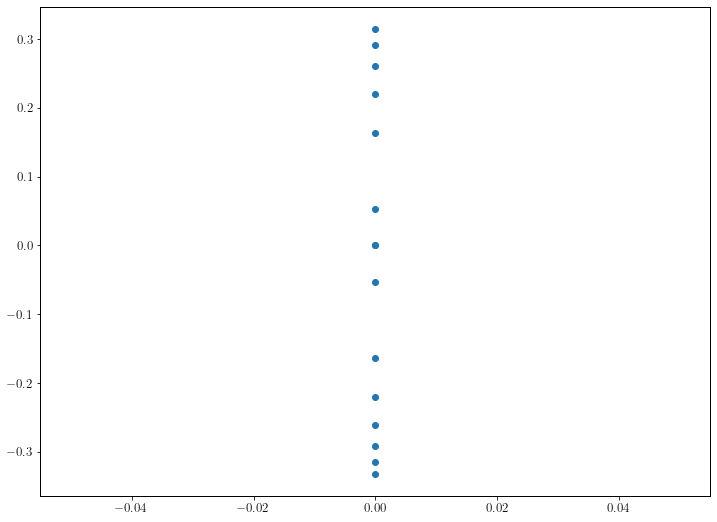

In [20]:
plt.plot(np.real(lEnigF1[indF])[:15], np.imag(lEnigF1[indF])[:15],'o')

In [21]:
lEnigF1[indF][:20]

array([0.+2.73816502e-05j, 0.-2.73816515e-05j, 0.-5.35300499e-02j,
       0.+5.35300499e-02j, 0.-1.64052252e-01j, 0.+1.64052252e-01j,
       0.-2.20758958e-01j, 0.+2.20758958e-01j, 0.-2.60992933e-01j,
       0.+2.60992933e-01j, 0.+2.91030294e-01j, 0.-2.91030294e-01j,
       0.+3.14138485e-01j, 0.-3.14138485e-01j, 0.-3.32320236e-01j,
       0.+3.32320236e-01j, 0.+3.46889502e-01j, 0.-3.46889502e-01j,
       0.+3.58745644e-01j, 0.-3.58745644e-01j])

In [ ]:
# salvando
name = 'LamEC_%1d_%1d.dat'%(ell, nodos)

np.savetxt(name, lEnigF1[indF])

In [7]:
jj = np.real(lEnigF1)!=0
autovec = VF1[:, jj]
autoval = lEnigF1[jj]

autoval#*lam**2

array([], dtype=complex128)

In [51]:
# salvando
name = 'LamE_%1d_%1d.dat'%(ell, nodos)

np.savetxt(name, lEnigF1)

## Plot Autovalores

In [3]:
# cargando datos

datos = []
name = []
for i in range(0,8,2):
    temp = np.loadtxt('LamE_%1d.dat'%i, dtype='complex')
    name.append('%1d'%i)  
    datos.append(temp)

# creando dataframe
datos = np.array(datos).T
datos_Autov = pd.DataFrame(datos)
# poniendo nuevos nombres
datos_Autov.columns = name

nodos = 2
datos = []
name = []
for i in range(0,8,2):
    temp = np.loadtxt('LamE_%1d_%1d.dat'%(i,nodos), dtype='complex')
    name.append('%1d'%i)  
    datos.append(temp)

# creando dataframe
datos = np.array(datos).T
datos_Autov2 = pd.DataFrame(datos)
# poniendo nuevos nombres
datos_Autov2.columns = name

nodos = 4
datos = []
name = []
for i in range(0,8,2):
    temp = np.loadtxt('LamE_%1d_%1d.dat'%(i,nodos), dtype='complex')
    name.append('%1d'%i)  
    datos.append(temp)

# creando dataframe
datos = np.array(datos).T
datos_Autov3 = pd.DataFrame(datos)
# poniendo nuevos nombres
datos_Autov3.columns = name

#datos_Autov

In [4]:
 #np.real(datos_Autov['0'])

/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17879/3431151246.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14.5, 4.5),


Text(0.5, 0, '$\\lambda_R\\,[K^2/t_c]$')

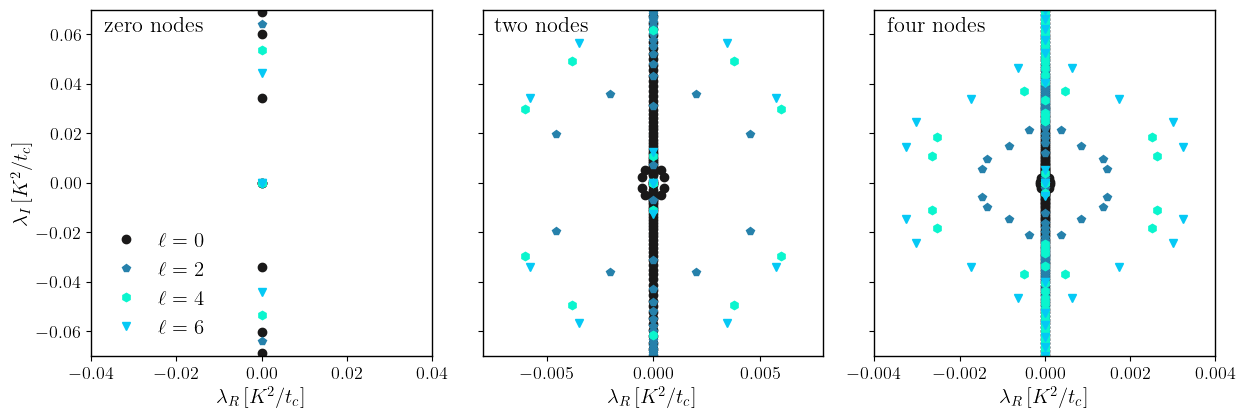

In [6]:
col = ['#1a1919', '#2681ab', '#0af5ce', '#05c9f5']
mark = ['o', 'p', 'h', 'v']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14.5, 4.5),
                       sharex=False, sharey=True,
                       gridspec_kw=dict(hspace=0, wspace=.15) # espacio vertical y horizontal entre los subplots
                      ) 

for i in range(0, 8, 2):
    temp = datos_Autov['%1d'%i]
    real, imag, ell = np.real(temp), np.imag(temp), i
    

    ax[0].plot(real, imag, ls=' ', marker=mark[int(i/2)], c=col[int(i/2)], label=r'$\ell=%2d$'%ell)   

ax[0].text(x=-0.037,y=0.061, s=r'zero nodes')
ax[0].set_xlim(-0.04, 0.04)
ax[0].set_ylim(-0.07, 0.07)
ax[0].legend(loc='lower left',frameon=False)
ax[0].set_xlabel(r'$\lambda_R\,[K^2/t_c]$')
ax[0].set_ylabel(r'$\lambda_I\,[K^2/t_c]$')
#ax[0].set_ylabel(r'$\sigma^{(0)}_{\ell}\,[c_1]$', labelpad=10)


for i in range(0, 8, 2):
    temp = datos_Autov2['%1d'%i]
    real, imag, ell = np.real(temp), np.imag(temp), i
    
    ax[1].plot(real, imag, ls=' ', marker=mark[int(i/2)], c=col[int(i/2)], label=r'$\ell=%2d$'%ell)

ax[1].text(x=-0.0075,y=0.061, s=r'two nodes')
ax[1].set_xlim(-0.008, 0.008)
#ax[1].set_ylim(-0.07, 0.07)
ax[1].set_xlabel(r'$\lambda_R\,[K^2/t_c]$')
#ax[1].set_ylabel(r'$\lambda_I\,[c_3^{-1}]$')
#ax

for i in range(0, 8, 2):
    temp = datos_Autov3['%1d'%i]
    real, imag, ell = np.real(temp), np.imag(temp), i
    
    ax[2].plot(real, imag, ls=' ', marker=mark[int(i/2)], c=col[int(i/2)], label=r'$\ell=%2d$'%ell)

ax[2].text(x=-0.0037, y=0.061, s=r'four nodes')
ax[2].set_xlim(-0.004, 0.004)
#ax[2].set_ylim(-0.08, 0.08)
ax[2].set_xlabel(r'$\lambda_R\,[K^2/t_c]$')
#ax[1].set_ylabel(r'$\lambda_I\,[c_3^{-1}]$')
#ax

In [7]:
fig.savefig('lambEng.pgf', format='pgf', #metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

In [8]:
fig.savefig('lambEng.eps', format='eps', #metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )